# Data Loading

## Import libraries

In [194]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import tensorflow as tf
from tensorflow import keras
from keras.layers import LSTM ,Dense ,Dropout
from keras.models import Sequential
from math import sqrt
import xgboost as xgb
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

In [195]:
user_input = pd.read_csv("Test.csv")

In [196]:
train = pd.read_csv("Train.csv")
user_input = pd.read_csv("Test.csv")
test =  user_input.drop('Current_Inventory',axis = 1)


In [197]:
train.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,995


In [198]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


# Data Preprocessing / Visualisation

### Checking for null values and replacing it with appropriate values

In [199]:
# Null values found in train data
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [200]:
# Null values found in test data
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [201]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 799.2+ KB


In [202]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [203]:
# Substituting mean values in place of null values for 'Item Weight' column
train['Item_Weight'].fillna(train['Item_Weight'].mean(),inplace=True)
test['Item_Weight'].fillna(test['Item_Weight'].mean(),inplace=True)

In [204]:
# Filling missing values in 'Outlet_Size' column with the mode
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0],inplace=True)
test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0],inplace=True)

In [205]:
# No null values found in train data
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [206]:
# No null values found in test data
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [207]:

train.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,995


### Checking for zero values and replacing it with appropriate values

In [208]:
def zero_value_column_finder (data):
    # Find columns with zero values
    columns_with_zeros = data.columns[data.eq(0).any()]

    print("Columns with Zero Values:")
    print(columns_with_zeros)

In [209]:
#Find columns having zero values for train data
zero_value_column_finder(train)

Columns with Zero Values:
Index(['Item_Visibility'], dtype='object')


In [210]:
#Find columns having zero values for test data
zero_value_column_finder(test)

Columns with Zero Values:
Index(['Item_Visibility'], dtype='object')


In [211]:
def handling_zero_values(data):
  zero_mask = (data['Item_Visibility'] == 0)
    
  # Handle zero values by replacing with the mean
  non_zero_values = data['Item_Visibility'][~zero_mask]
  mean_non_zero = non_zero_values.mean()
  data.loc[zero_mask,'Item_Visibility'] = mean_non_zero

In [212]:
# Replacing zero values with their mean for train and test data
handling_zero_values(train)
handling_zero_values(test)


In [213]:
#No columns having zero values for train data
zero_value_column_finder(train)

Columns with Zero Values:
Index([], dtype='object')


In [214]:
#No columns having zero values for train data
zero_value_column_finder(test)

Columns with Zero Values:
Index([], dtype='object')


### Optimise 'Fat Content' column

In [215]:
# Inconsistent values found for same data
print("Uniques Fat contents for train:",train.Item_Fat_Content.unique())
print("Uniques Fat contents for test:",test.Item_Fat_Content.unique())

Uniques Fat contents for train: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Uniques Fat contents for test: ['Low Fat' 'reg' 'Regular' 'LF' 'low fat']


In [216]:
def fat_content_optimiser(data):
    fat_content ={'low fat':'Low Fat',
              'LF':'Low Fat',
              'reg':'Regular'}
    data['Item_Fat_Content'] = data['Item_Fat_Content'].replace(fat_content)


In [217]:
#Optimise fat content column for both train and test data
fat_content_optimiser(train)
fat_content_optimiser(test)

In [218]:
print("Uniques Fat contents for train:",train.Item_Fat_Content.unique())
print("Uniques Fat contents for test:",test.Item_Fat_Content.unique())

Uniques Fat contents for train: ['Low Fat' 'Regular']
Uniques Fat contents for test: ['Low Fat' 'Regular']


In [219]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097
3,FDX07,19.20,Regular,0.070482,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732
4,NCD19,8.93,Low Fat,0.070482,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,995


In [220]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [221]:
# Test dataset represents user_input to model, hence copying it to another dataframe for purpose of visualisation at the end
# user_input=test.copy()

### Data Visualisations

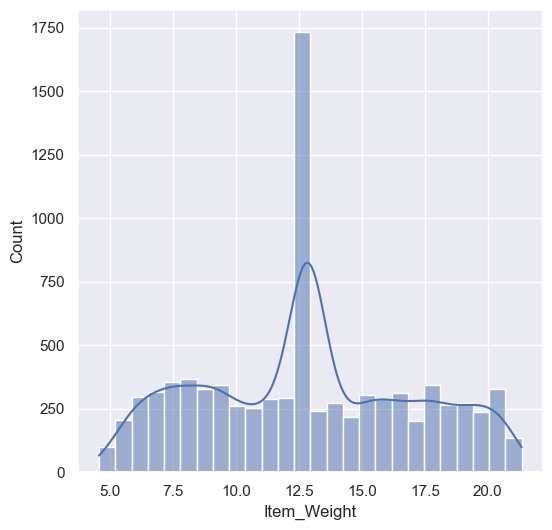

In [222]:
sns.set()
# Item_Weight distribution
plt.figure(figsize=(6,6))
sns.histplot(train.Item_Weight,kde=True)
plt.show()

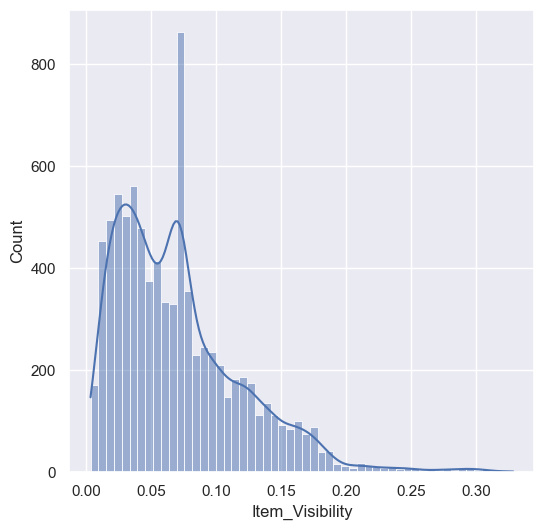

In [223]:

# Item Visibility distribution
plt.figure(figsize=(6, 6))
sns.histplot(train['Item_Visibility'], kde=True)
plt.show()

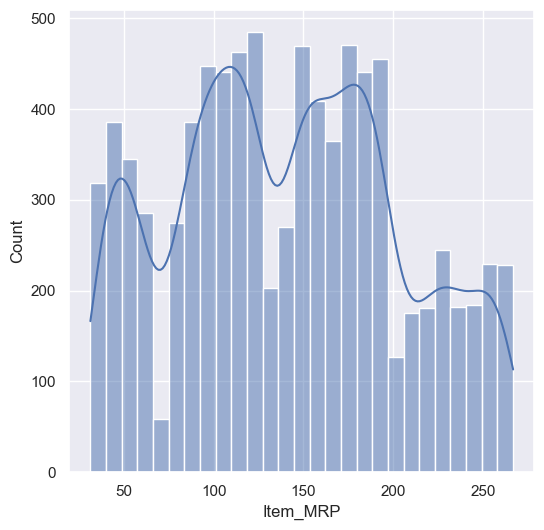

In [224]:
# Item MRP distribution
plt.figure(figsize=(6,6))
sns.histplot(train['Item_MRP'],kde=True)
plt.show()

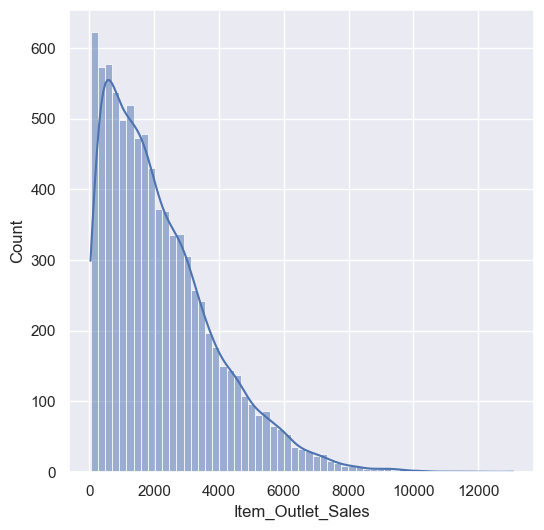

In [225]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.histplot(train['Item_Outlet_Sales'],kde=True)
plt.show()

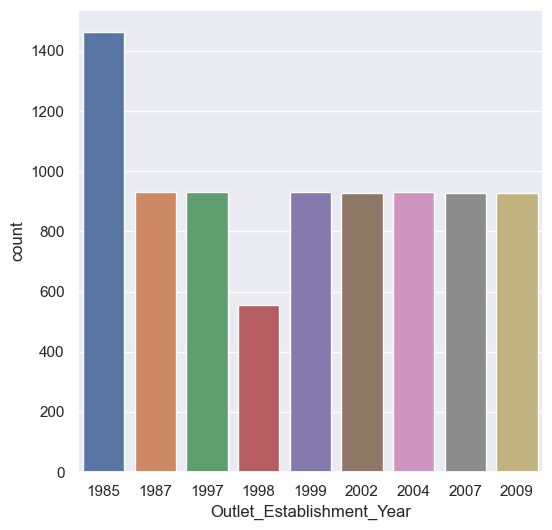

In [226]:
# Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=train)
plt.show()

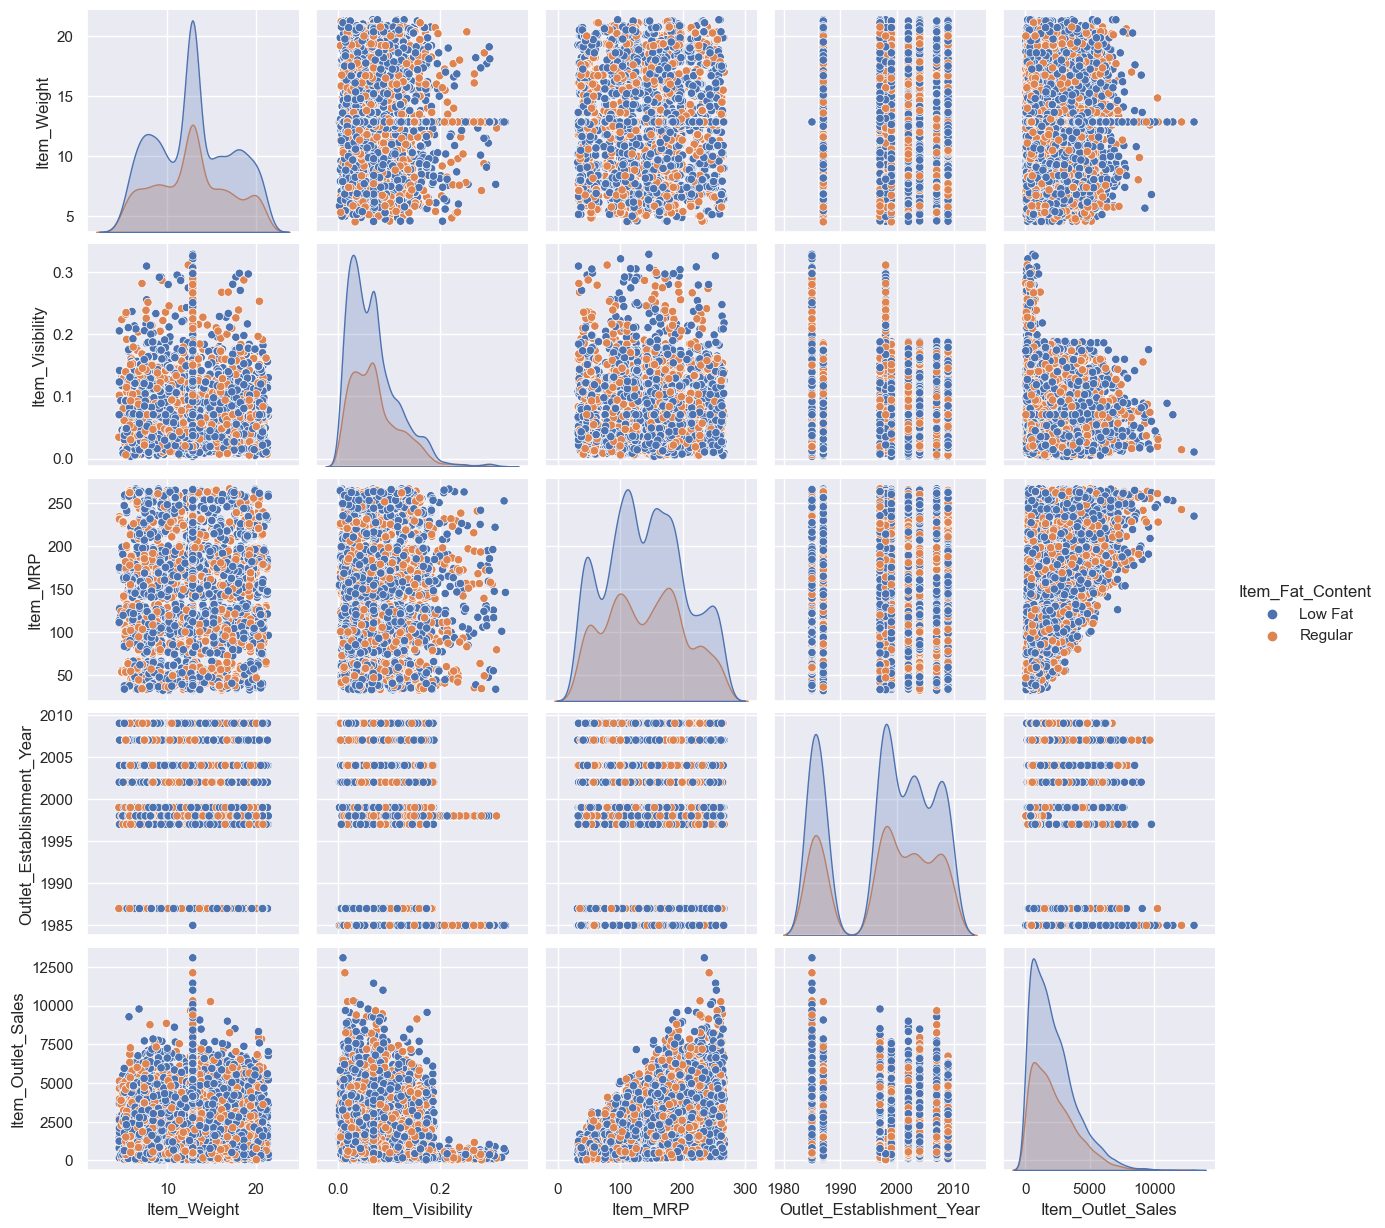

In [227]:
sns.pairplot(train,hue='Item_Fat_Content',)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11688\2915376794.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),annot=True, cmap='YlOrBr')


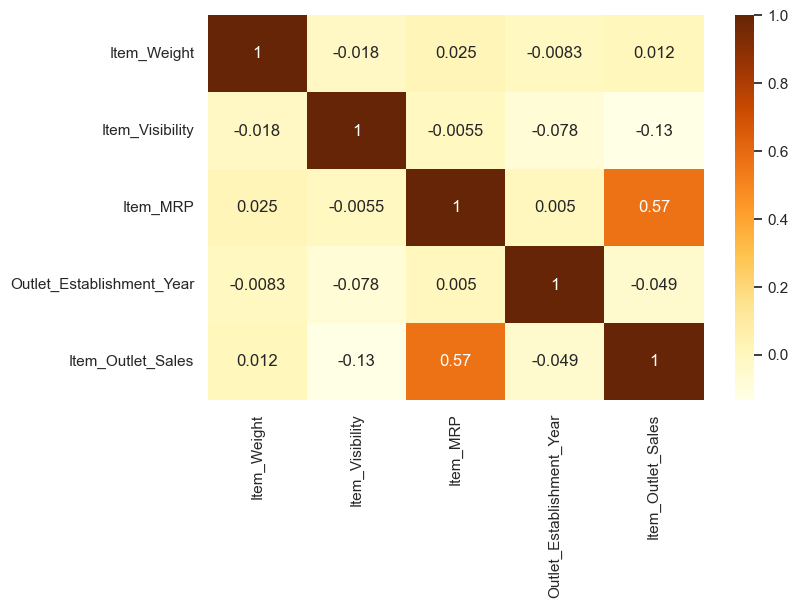

In [228]:
plt.figure(figsize=(8,5))
sns.heatmap(train.corr(),annot=True, cmap='YlOrBr')
plt.show()

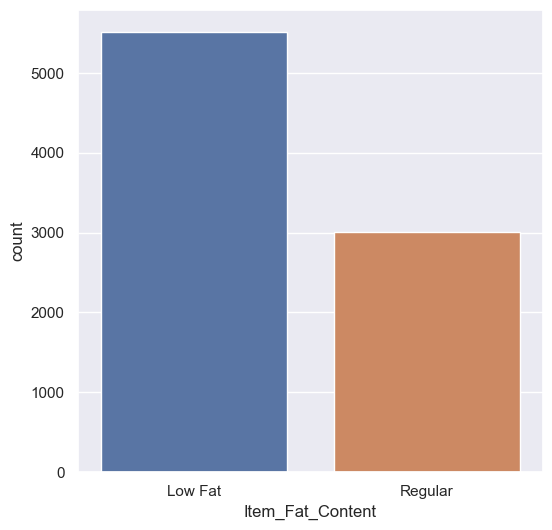

In [229]:
# Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=train)
plt.show()

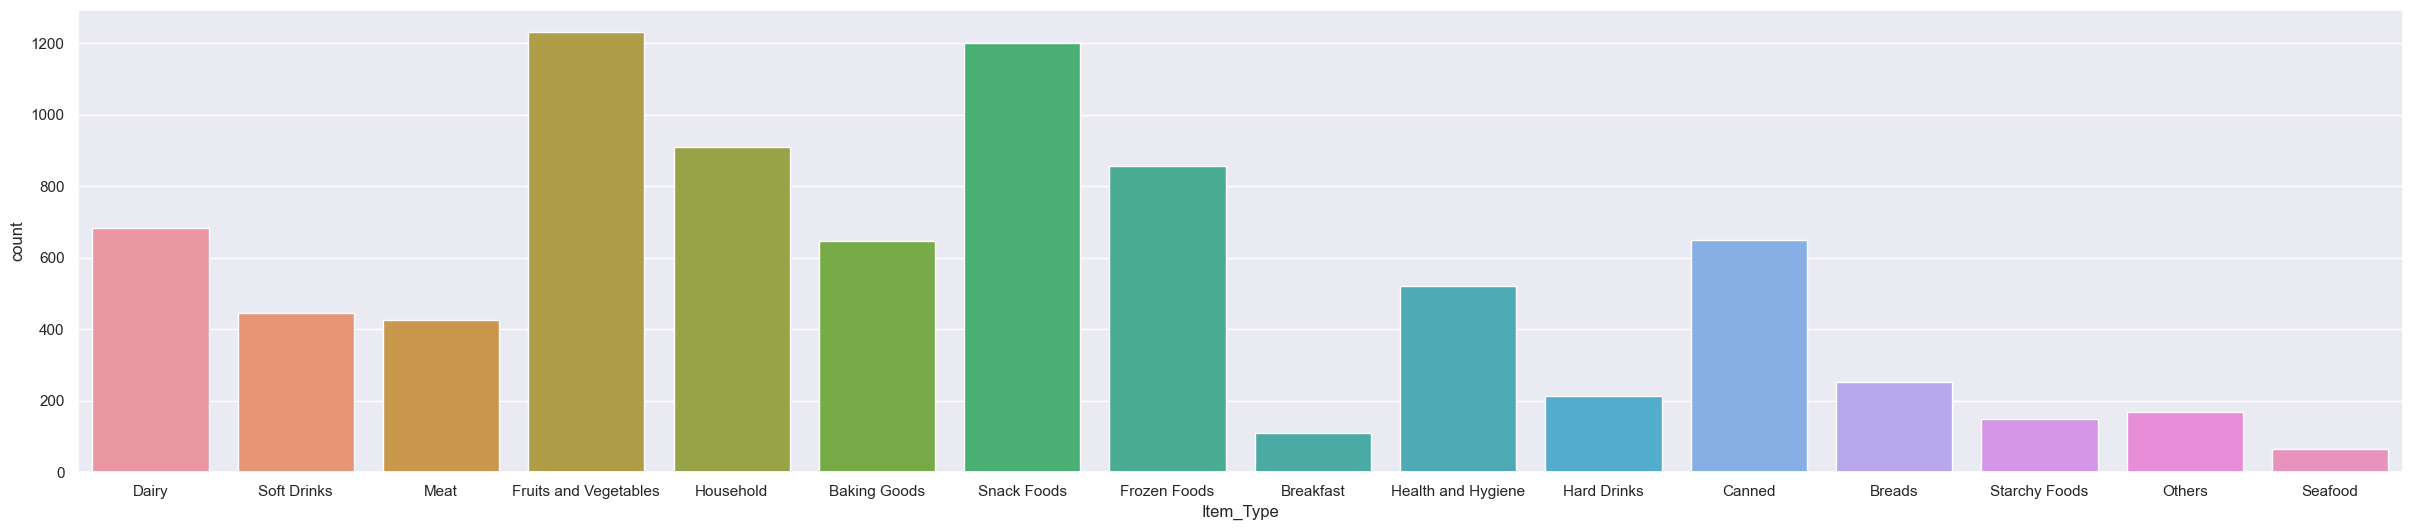

In [230]:
# Item_Type column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=train)
plt.show()

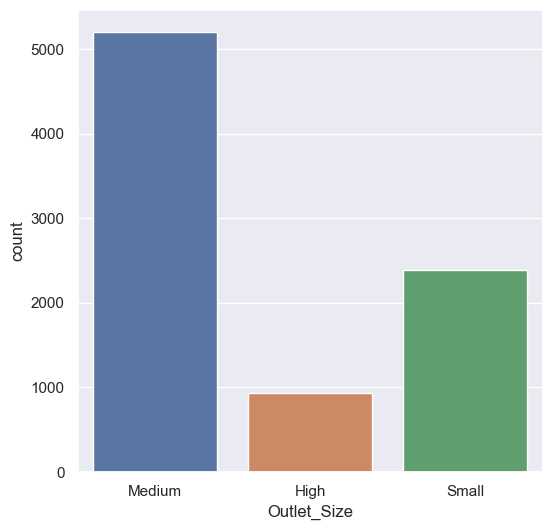

In [231]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=train)
plt.show()

### Changing oulet establishment year column with a new column 'Outlet Years' showing the total active years of the store

In [232]:
train['Outlet_Years']=2023-train['Outlet_Establishment_Year']

test['Outlet_Years']=2023-test['Outlet_Establishment_Year']

In [233]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443,14
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097,24
3,FDX07,19.20,Regular,0.070482,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732,25
4,NCD19,8.93,Low Fat,0.070482,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,995,36


### Removing Unwanted columns from dataset

In [234]:

train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1,inplace=True)
test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1,inplace=True)

In [235]:
train.head()


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735,24
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443,14
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097,24
3,19.20,Regular,0.070482,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732,25
4,8.93,Low Fat,0.070482,Household,53.8614,High,Tier 3,Supermarket Type1,995,36


### Label encoding to replace string values into numerical values

In [236]:
def label_encoder(data):
 columns_to_encode = ['Item_Fat_Content', 'Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']
 label_encoder = LabelEncoder()

 for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column]) + 1

In [237]:
# Performing label encoding on train and test data
label_encoder(train)
label_encoder(test)

In [238]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,9.30,1,0.016047,5,249.8092,2,1,2,3735,24
1,5.92,2,0.019278,15,48.2692,2,3,3,443,14
2,17.50,1,0.016760,11,141.6180,2,1,2,2097,24
3,19.20,2,0.070482,7,182.0950,2,3,1,732,25
4,8.93,1,0.070482,10,53.8614,1,3,2,995,36


In [239]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years
0,20.750000,1,0.007565,14,107.8622,2,1,2,24
1,8.300000,2,0.038428,5,87.3198,2,2,2,16
2,14.600000,1,0.099575,12,241.7538,2,3,1,25
3,7.315000,1,0.015388,14,155.0340,2,2,2,16
4,12.695633,2,0.118599,5,234.2300,2,3,4,38


### Without any Outlier detection,data scaling or hyperparameter tuning

In [240]:
X = train.drop('Item_Outlet_Sales',axis = 1)
y = train['Item_Outlet_Sales']

In [241]:
x_train, x_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [242]:
# Define the function to create the LSTM model
def model_lstm():
 model = Sequential()
 model.add(LSTM(20, input_shape=(9, 1)))
 model.add(Dense(10, activation='relu'))
 model.add(Dense(5, activation='relu'))
 model.add(Dense(2, activation='relu'))
 model.add(Dense(1, activation='linear'))
 optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
 model.compile(loss='mse', optimizer=optimizer, metrics=['mse', 'mae'])
 return model



In [243]:
lstm = model_lstm()
history = lstm.fit(x_train,Y_train,validation_data=(x_test,Y_test),epochs=100,verbose=2)

Epoch 1/100


214/214 - 3s - loss: 7767757.0000 - mse: 7767757.0000 - mae: 2193.2129 - val_loss: 6941367.5000 - val_mse: 6941367.5000 - val_mae: 2055.1018 - 3s/epoch - 12ms/step
Epoch 2/100
214/214 - 1s - loss: 6860088.5000 - mse: 6860088.5000 - mae: 1990.2374 - val_loss: 5046221.5000 - val_mse: 5046221.5000 - val_mae: 1624.2655 - 688ms/epoch - 3ms/step
Epoch 3/100
214/214 - 1s - loss: 4161772.0000 - mse: 4161772.0000 - mae: 1462.3866 - val_loss: 2824571.0000 - val_mse: 2824571.0000 - val_mae: 1271.6820 - 670ms/epoch - 3ms/step
Epoch 4/100
214/214 - 1s - loss: 2993142.5000 - mse: 2993142.5000 - mae: 1337.5336 - val_loss: 2728568.7500 - val_mse: 2728568.7500 - val_mae: 1321.2604 - 708ms/epoch - 3ms/step
Epoch 5/100
214/214 - 1s - loss: 2959133.7500 - mse: 2959133.7500 - mae: 1358.2782 - val_loss: 2728464.7500 - val_mse: 2728464.7500 - val_mae: 1321.1575 - 685ms/epoch - 3ms/step
Epoch 6/100
214/214 - 1s - loss: 2958894.5000 - mse: 2958894.5000 - mae: 1356.0511 - val_loss: 2732361.7500 - val_mse: 27323

In [244]:

rf= RandomForestRegressor()
rf.fit(x_train,Y_train)

RandomForestRegressor()

In [245]:
xgb=xgb.XGBRegressor()
xgb.fit(x_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [246]:
y_pred_rf=rf.predict(x_test)
y_pred_xgb = xgb.predict(x_test)
y_pred_lstm = lstm.predict(x_test)

54/54 [==============================] - 0s 2ms/step


In [247]:
print("R2 scores before data scaling,outlier detection or hyperparameter tuning")
print("===========================================================================")
print("R2 score of random forest model:",r2_score(Y_test,y_pred_rf))
print("R2 score of XGB model:",r2_score(Y_test,y_pred_xgb))
print("R2 score of lstm model:",r2_score(Y_test,y_pred_lstm))

R2 scores before data scaling,outlier detection or hyperparameter tuning
R2 score of random forest model: 0.5730567939227657
R2 score of XGB model: 0.5539640075888196
R2 score of lstm model: 0.6109981911373693


##### Very low accuracy is found for all the 3 models, hence we are performing outlier detection/handling,data scaling and hyperparameter tuning.

### Outlier Detection and handling

#### No outliers found for 'Item Weight'

<Axes: xlabel='Item_Weight'>

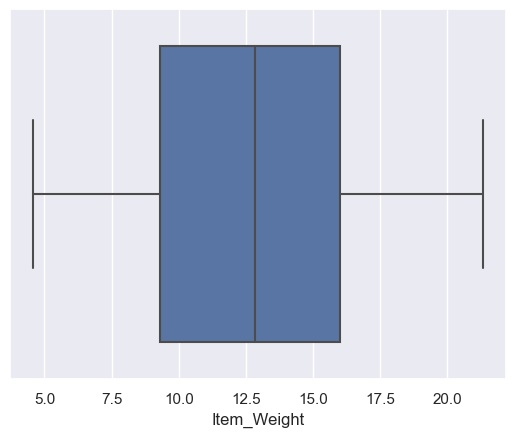

In [248]:
sns.boxplot(x=train['Item_Weight'])

#### Significant amount of outliers found for item visibility

<Axes: xlabel='Item_Visibility'>

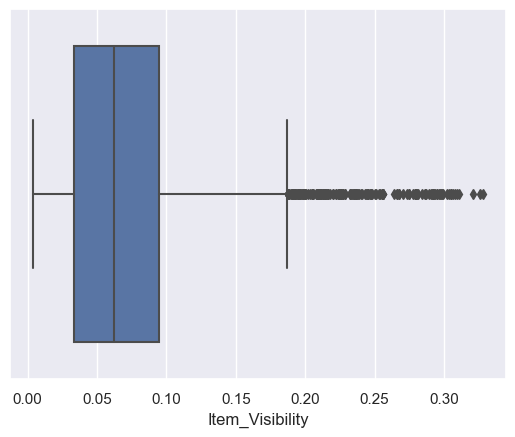

In [249]:
sns.boxplot(x=train['Item_Visibility'])

#### No outliers found for 'Item MRP'

<Axes: xlabel='Item_MRP'>

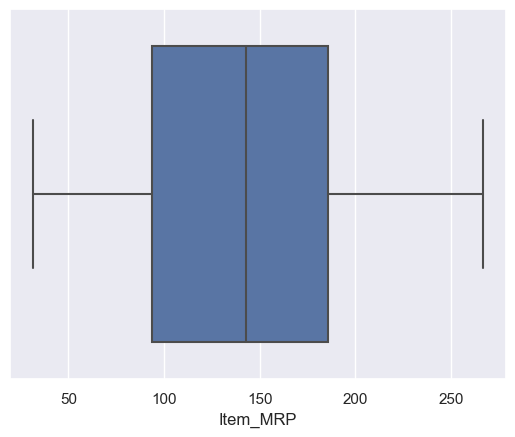

In [250]:
sns.boxplot(x=train['Item_MRP'])

#### Significant amount of outliers found for Outlet Sales


<Axes: xlabel='Item_Outlet_Sales'>

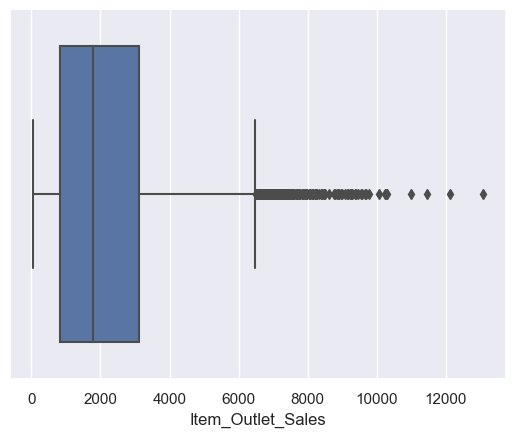

In [251]:
sns.boxplot(x= train['Item_Outlet_Sales'])


#### No outliers found for Outlet Years


<Axes: xlabel='Outlet_Years'>

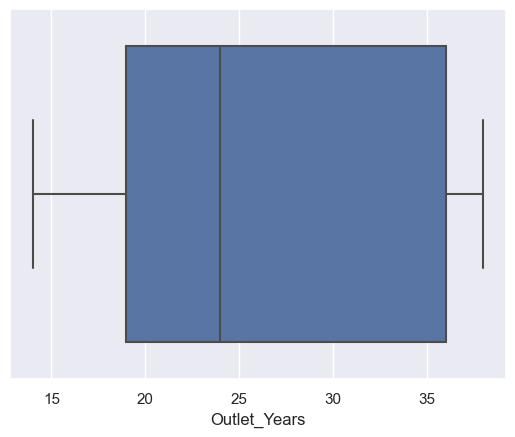

In [252]:
sns.boxplot(x=train['Outlet_Years'])

### Outlier Handling by downsampling (removing outlier data from dataset)

In [253]:
# Define the columns you want to check for outliers
columns_to_check = ['Item_Visibility', 'Item_Outlet_Sales']

# Calculate IQR for each column

# Calculate Q1 and Q3 for each column
Q1 = train[columns_to_check].quantile(0.25)
Q3 = train[columns_to_check].quantile(0.75)


IQR = Q3 - Q1
print(IQR)

# Identify potential outliers
outliers = ((train[columns_to_check] < (Q1 - 1.5 * IQR)) | (train[columns_to_check] > (Q3 + 1.5 * IQR)))

# Filter out outliers
train_no_outliers = train[~outliers.any(axis=1)]




Item_Visibility         0.0615
Item_Outlet_Sales    2266.5000
dtype: float64


In [254]:
train_no_outliers

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,9.300,1,0.016047,5,249.8092,2,1,2,3735,24
1,5.920,2,0.019278,15,48.2692,2,3,3,443,14
2,17.500,1,0.016760,11,141.6180,2,1,2,2097,24
3,19.200,2,0.070482,7,182.0950,2,3,1,732,25
4,8.930,1,0.070482,10,53.8614,1,3,2,995,36
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,14,214.5218,1,3,2,2778,36
8519,8.380,2,0.046982,1,108.1570,2,2,2,549,21
8520,10.600,1,0.035186,9,85.1224,3,2,2,1193,19
8521,7.210,2,0.145221,14,103.1332,2,3,3,1846,14


<Axes: xlabel='Item_Outlet_Sales'>

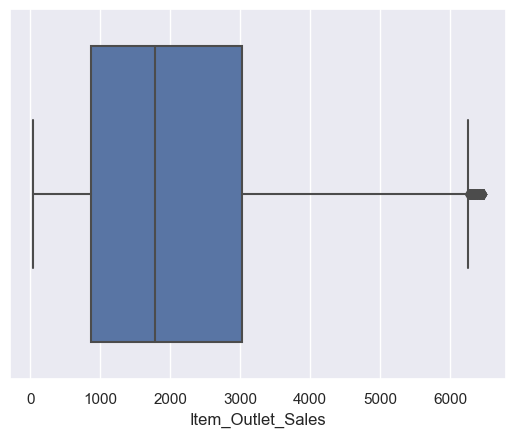

In [255]:
sns.boxplot(x= train_no_outliers['Item_Outlet_Sales'])


<Axes: xlabel='Item_Visibility'>

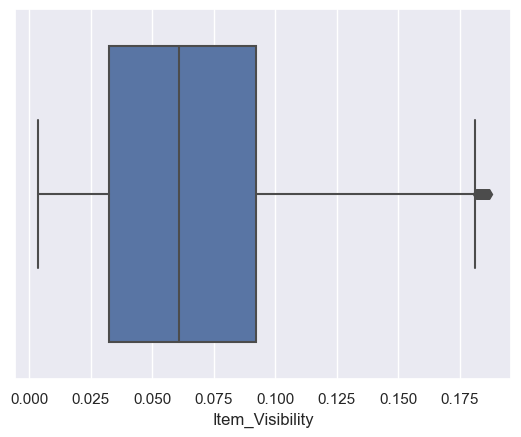

In [256]:
sns.boxplot(x= train_no_outliers['Item_Visibility'])


In [257]:

X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(train_no_outliers.drop('Item_Outlet_Sales',axis = 1), train_no_outliers['Item_Outlet_Sales'], test_size=0.2, random_state=42)
rf.fit(X_train_no_outliers,y_train_no_outliers)
print("R2 score after outlier removal:", r2_score(y_test_no_outliers,(rf.predict(X_test_no_outliers))))


R2 score after outlier removal: 0.4978108888994719


### Outlier Handling by retaining the given data, performing box-cox and cuberoot transformations

#### After box-cox transformation on 'Item_Visibility' column oulier effect is reduced

In [258]:
from scipy import stats
def box_cox_transform(data):
    transformed_column, _ = stats.boxcox(data+ 1)  # Adding 1 to handle zero and negative values
    data = transformed_column
    return data

In [259]:
train['Item_Visibility'] = box_cox_transform(train['Item_Visibility'])
test['Item_Visibility'] = box_cox_transform(test['Item_Visibility'])

<Axes: xlabel='Item_Visibility'>

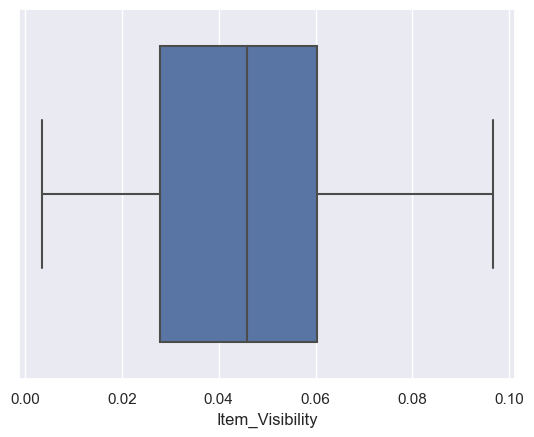

In [260]:
sns.boxplot(x=train['Item_Visibility'])


In [261]:
# train['Item_Visibility']=np.log(train['Item_Visibility'])
# test['Item_Visibility']=np.log(test['Item_Visibility'])

#### After cube-root transformation on 'Item_Sales' column oulier effect is reduced

<Axes: xlabel='Item_Outlet_Sales'>

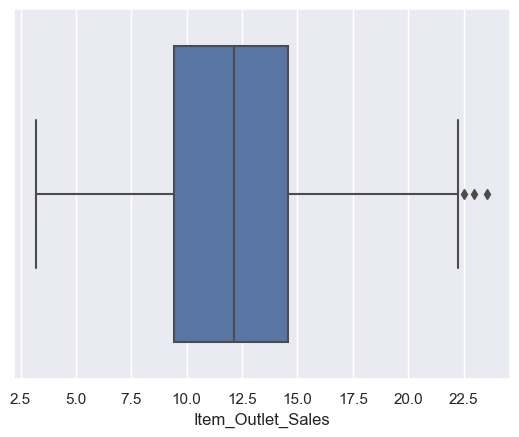

In [262]:
sns.boxplot(x= np.cbrt(train['Item_Outlet_Sales']))

In [263]:
train['Item_Outlet_Sales']=np.cbrt(train['Item_Outlet_Sales'])

In [264]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,9.30,1,0.014752,5,249.8092,2,1,2,15.515420,24
1,5.92,2,0.017432,15,48.2692,2,3,3,7.623152,14
2,17.50,1,0.015351,11,141.6180,2,1,2,12.799691,24
3,19.20,2,0.049855,7,182.0950,2,3,1,9.012329,25
4,8.93,1,0.049855,10,53.8614,1,3,2,9.983305,36


### Min-Max Scaling of data

In [265]:

def min_max_scaler(data):
 col = ["Item_Fat_Content","Item_Type","Outlet_Size","Outlet_Type","Outlet_Location_Type","Item_Weight","Item_MRP","Outlet_Years"]
 for i in col:
    data[i] = (data[i]-data[i].min())/(data[i].max()-data[i].min())

In [266]:
min_max_scaler(train)
min_max_scaler(test)

### Train_Test split of data

In [267]:
X = train.drop('Item_Outlet_Sales',axis = 1)
y = train['Item_Outlet_Sales']

In [268]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [269]:
X_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years
549,0.294433,1.0,0.029396,0.400000,0.594464,0.5,0.0,0.333333,0.416667
7757,0.800536,0.0,0.037357,0.600000,0.591057,0.5,0.5,0.333333,0.291667
764,0.776719,1.0,0.052502,0.666667,0.341387,1.0,0.0,0.333333,0.500000
6867,0.224472,0.0,0.025588,0.400000,0.043819,0.5,0.5,0.333333,0.291667
2716,0.493897,0.0,0.073505,0.866667,0.527478,1.0,0.0,0.333333,0.500000
...,...,...,...,...,...,...,...,...,...
5734,0.288181,1.0,0.094182,0.400000,0.457956,0.5,1.0,0.000000,0.458333
5191,0.657636,0.0,0.068044,0.333333,0.188359,0.5,0.5,0.333333,0.083333
5390,0.776719,0.0,0.017159,0.533333,0.874662,0.5,0.5,0.333333,0.291667
860,0.940458,0.0,0.041408,0.866667,0.367815,0.5,0.5,0.333333,0.083333


In [270]:
y_train

549     13.362575
7757    14.587266
764     10.400419
6867     6.573138
2716    16.166236
          ...    
5734     6.549912
5191    10.919523
5390    18.316422
860     11.816658
7270     9.881945
Name: Item_Outlet_Sales, Length: 6818, dtype: float64

#### Function to perform GridSearch

In [271]:
def gridSearch(model,params):
 # Create the GridSearchCV object
 grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, n_jobs=-1,verbose=2)
 grid_search.fit(X_train,y_train)
 # Print the best hyperparameters found by GridSearchCV
 print("Best Hyperparameters:", grid_search.best_params_)
 
 return grid_search.best_params_


# Model Training and Testing

## Random Forest Model

In [272]:

rf= RandomForestRegressor()

In [273]:
param_grid = {
    'n_estimators': [500, 1000],
    'max_depth': [None,10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}

In [274]:
best_params_rf = gridSearch(rf,param_grid)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 500}


In [275]:
best_rf=RandomForestRegressor(max_depth=best_params_rf['max_depth'], min_samples_leaf= best_params_rf['min_samples_leaf'], min_samples_split=best_params_rf['min_samples_split'],n_estimators=best_params_rf['n_estimators'])
best_rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                      n_estimators=500)

In [276]:
y_pred =best_rf.predict(X_test)
y_pred_train =best_rf.predict(X_train)

In [277]:
rf_r2Score=r2_score(y_test,y_pred)
rf_r2Score_train = r2_score(y_train,y_pred_train)
rf_mae = mean_absolute_error(y_test,y_pred)
rf_rmse = sqrt (mean_squared_error(y_test, y_pred))

# Calculate Mean Absolute Percentage Error
rf_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Random Forest r2Score :" , rf_r2Score)
print("Random Forest train r2Score :" ,rf_r2Score_train)
print("Random Forest mean absolute error :",rf_mae)
print("Random Forest root mean square error :",rf_rmse)
print("Random Forest mean absolute percentage error :",rf_mape)

Random Forest r2Score : 0.704838590799787
Random Forest train r2Score : 0.767777431750653
Random Forest mean absolute error : 1.5077628223163224
Random Forest root mean square error : 1.936183205551795
Random Forest mean absolute percentage error : 14.205802616810859


## Extreme Gradient Boost Model

In [278]:
import xgboost as xgb
# XGBoost=xgb.XGBRegressor()
xgb_model = xgb.XGBRegressor()

In [279]:
param_xgb = {
    'max_depth': [5, 7],           # Max depth of the tree
    'learning_rate': [0.1, 0.01],     # Step size shrinkage used in update to prevent overfitting
    'n_estimators': [500, 1000],  # Number of boosting rounds
    'min_child_weight': [3, 5],    # Minimum sum of instance weight (hessian) needed in a child
    'gamma': [0, 0.1],
    'alpha': [0, 0.1]
}

In [280]:
best_params_xgb = gridSearch(xgb_model,param_xgb)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


Best Hyperparameters: {'alpha': 0.1, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 500}


In [281]:
best_xgb = xgb.XGBRegressor(max_depth=best_params_xgb['max_depth'],learning_rate =best_params_xgb['learning_rate'], min_child_weight=best_params_xgb['min_child_weight'],n_estimators=best_params_xgb['n_estimators'],alpha=best_params_xgb['alpha'],gamma=best_params_xgb['gamma'])
best_xgb .fit(X_train,y_train)

XGBRegressor(alpha=0.1, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [282]:
y_pred_xgb = best_xgb.predict(X_test)
y_pred_xgb_train = best_xgb.predict(X_train)

In [283]:
xgb_r2Score=r2_score(y_test,y_pred_xgb)
xgb_r2Score_train = r2_score(y_train,y_pred_xgb_train)
xgb_mae = mean_absolute_error(y_test,y_pred_xgb)
xgb_rmse = sqrt (mean_squared_error(y_test, y_pred_xgb))

# Calculate Mean Absolute Percentage Error
xgb_mape = np.mean(np.abs((y_test - y_pred_xgb) / y_test)) * 100
print("XGB r2Score :" , xgb_r2Score)
print("XGB train r2Score :" ,xgb_r2Score_train)
print("XGB mean absolute error :",xgb_mae)
print("XGB root mean square error :",xgb_rmse)
print("XGB mean absolute percentage error :",xgb_mape)

XGB r2Score : 0.7080347060425566
XGB train r2Score : 0.7248646951737765
XGB mean absolute error : 1.5025360656612363
XGB root mean square error : 1.9256718243608568
XGB mean absolute percentage error : 14.0695084281144


## Long Short Term Memory (LSTM)

In [284]:
# Define the function to create the LSTM model
def create_lstm_model(units=32, dense_units=[64, 32], activation='relu', learning_rate=0.001):
    model = Sequential()
    model.add(LSTM(units, input_shape=(9, 1)))
    for units in dense_units:
        model.add(Dense(units, activation=activation))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='linear'))
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='mse', optimizer=optimizer, metrics=['mse', 'mae'])
    return model

In [285]:
units_values = [32,20]
dense_units_values = [[64, 32],[64, 32 , 10]]
activation_values = ['relu', 'tanh']
learning_rate_values = [0.001, 0.01]

In [286]:
# # Define early stopping
# from keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [287]:
# Manual hyperparameter tuning
best_r2_score = -float('inf')
for units in units_values:
    for dense_units in dense_units_values:
        for activation in activation_values:
            for learning_rate in learning_rate_values:
                model = create_lstm_model(units=units, dense_units=dense_units, activation=activation, learning_rate=learning_rate)
                model.fit(X_train, y_train, epochs=20,verbose=1)
                y_pred = model.predict(X_test)
                r2 = r2_score(y_test, y_pred)
                print(f"Hyperparameters: Units={units}, Dense Units={dense_units}, Activation={activation}, Learning Rate={learning_rate}, R2 Score={r2}")
                if r2 > best_r2_score:
                    best_r2_score = r2
                    best_hyperparameters = {
                        'units': units,
                        'dense_units': dense_units,
                        'activation': activation,
                        'learning_rate': learning_rate
                    }

print("Best Hyperparameters:", best_hyperparameters)
print("Best R2 Score:", best_r2_score)

Epoch 1/20


214/214 [==============================] - 2s 4ms/step - loss: 42.4238 - mse: 42.4238 - mae: 5.0740
Epoch 2/20
214/214 [==============================] - 1s 4ms/step - loss: 18.2826 - mse: 18.2826 - mae: 3.4481
Epoch 3/20
214/214 [==============================] - 1s 4ms/step - loss: 17.8414 - mse: 17.8414 - mae: 3.4079
Epoch 4/20
214/214 [==============================] - 1s 4ms/step - loss: 16.7329 - mse: 16.7329 - mae: 3.2986
Epoch 5/20
214/214 [==============================] - 1s 4ms/step - loss: 16.3483 - mse: 16.3483 - mae: 3.2535
Epoch 6/20
214/214 [==============================] - 1s 3ms/step - loss: 16.1486 - mse: 16.1486 - mae: 3.2397
Epoch 7/20
214/214 [==============================] - 1s 3ms/step - loss: 15.6106 - mse: 15.6106 - mae: 3.1794
Epoch 8/20
214/214 [==============================] - 1s 3ms/step - loss: 15.9799 - mse: 15.9799 - mae: 3.2265
Epoch 9/20
214/214 [==============================] - 1s 3ms/step - loss: 15.7623 - mse: 15.7623 - mae: 3.2072
Epoch 10/20


In [288]:
lstm_model = create_lstm_model(units=best_hyperparameters['units'], dense_units=best_hyperparameters['dense_units'], activation=best_hyperparameters['activation'], learning_rate=best_hyperparameters['learning_rate'])
history= lstm_model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,verbose=2)


Epoch 1/100
214/214 - 3s - loss: 25.7175 - mse: 25.7175 - mae: 4.0123 - val_loss: 12.6863 - val_mse: 12.6863 - val_mae: 2.9361 - 3s/epoch - 12ms/step
Epoch 2/100
214/214 - 1s - loss: 18.0142 - mse: 18.0142 - mae: 3.4209 - val_loss: 6.4594 - val_mse: 6.4594 - val_mae: 2.0668 - 856ms/epoch - 4ms/step
Epoch 3/100
214/214 - 1s - loss: 12.0514 - mse: 12.0514 - mae: 2.7811 - val_loss: 5.8756 - val_mse: 5.8756 - val_mae: 1.9606 - 856ms/epoch - 4ms/step
Epoch 4/100
214/214 - 1s - loss: 10.7532 - mse: 10.7532 - mae: 2.5855 - val_loss: 4.8165 - val_mse: 4.8165 - val_mae: 1.7425 - 851ms/epoch - 4ms/step
Epoch 5/100
214/214 - 1s - loss: 9.5680 - mse: 9.5680 - mae: 2.4193 - val_loss: 4.5898 - val_mse: 4.5898 - val_mae: 1.6740 - 851ms/epoch - 4ms/step
Epoch 6/100
214/214 - 1s - loss: 8.4240 - mse: 8.4240 - mae: 2.2536 - val_loss: 3.9937 - val_mse: 3.9937 - val_mae: 1.5663 - 900ms/epoch - 4ms/step
Epoch 7/100
214/214 - 1s - loss: 8.0114 - mse: 8.0114 - mae: 2.1855 - val_loss: 3.9048 - val_mse: 3.9048

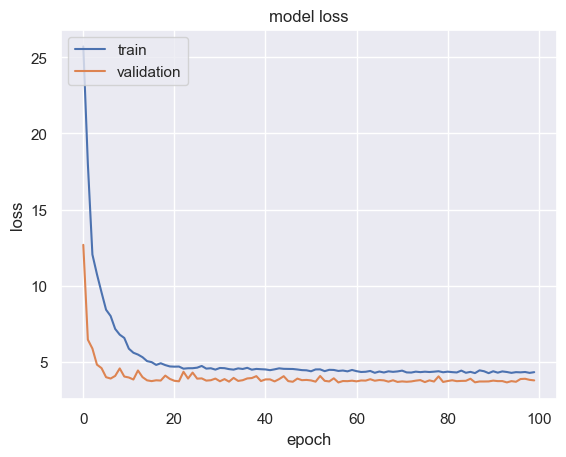

In [289]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [290]:
y_pred_lstm=lstm_model.predict(X_test)
y_pred_lstm_train=lstm_model.predict(X_train)

214/214 [==============================] - 0s 2ms/step


In [291]:
y_pred_lstm.max()

17.739115

In [292]:
lstm_r2Score=r2_score(y_test,y_pred_lstm)
lstm_r2Score_train = r2_score(y_train,y_pred_lstm_train)
lstm_mae = mean_absolute_error(y_test,y_pred_lstm)
lstm_rmse = sqrt (mean_squared_error(y_test, y_pred_lstm))

# Calculate Mean Absolute Percentage Error
lstm_mape = np.mean(np.abs((y_test - y_pred_lstm.flatten()) / y_test)) * 100
print("LSTM r2Score :" , lstm_r2Score)
print("LSTM train r2Score :" ,lstm_r2Score_train)
print("LSTM mean absolute error :",lstm_mae)
print("LSTM root mean square error :",lstm_rmse)
print("LSTM mean absolute percentage error :",lstm_mape)

LSTM r2Score : 0.7020475353045104
LSTM train r2Score : 0.6975749050593627
LSTM mean absolute error : 1.5156441197276445
LSTM root mean square error : 1.9453159708253827
LSTM mean absolute percentage error : 14.831712421285017


### Comparing 3 models

In [293]:
# Sample data
models = ['Random Forest', 'XGBoost', 'LSTM']
r2_values = [rf_r2Score,xgb_r2Score,lstm_r2Score]
mae_values = [rf_mae,xgb_mae,lstm_mae]
rmse_values = [rf_rmse,xgb_rmse,lstm_rmse]
mape_values = [rf_mape,xgb_mape,lstm_mape]

In [294]:
def visualise_comparison(values,matrix):
 # Create a DataFrame or use lists
 data = {'Models': models, matrix: values}
 df = pd.DataFrame(data)


 # Create the bar plot
 plt.figure(figsize=(6, 4))
 ax = sns.barplot(x='Models', y= matrix, data=df, palette="Set2")

 # Set the style without background grid and borders
 sns.set(style="white")

 # Add value annotations above each bar
 for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{bar.get_height():.3f}',  # Format value to 2 decimal places
        ha='center', va='bottom'
    )
 # Remove the top border
 ax.spines['top'].set_visible(False)
 ax.spines['right'].set_visible(False)

 # Adjust top padding
 plt.subplots_adjust(top=1)
 # Add labels and title
 ax.set_xlabel("Models")
 ax.set_ylabel(matrix)

 plt.show()



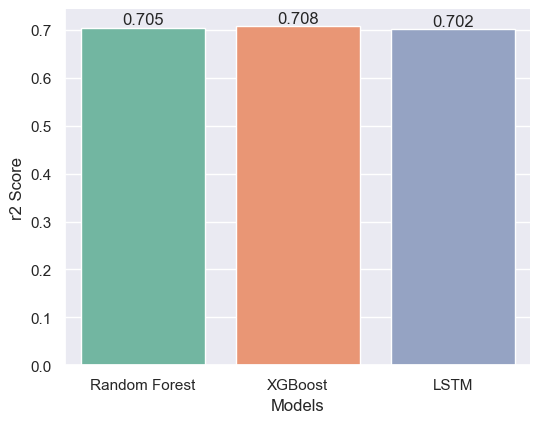

In [295]:
visualise_comparison(r2_values,'r2 Score')

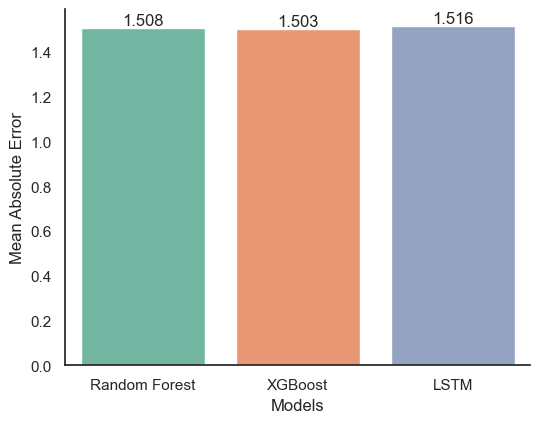

In [296]:
visualise_comparison(mae_values,'Mean Absolute Error')

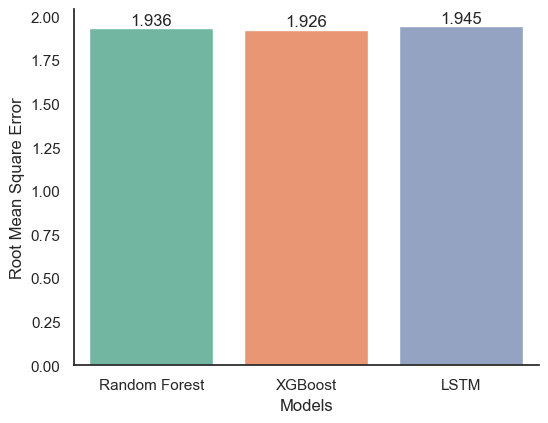

In [297]:
visualise_comparison(rmse_values,'Root Mean Square Error')

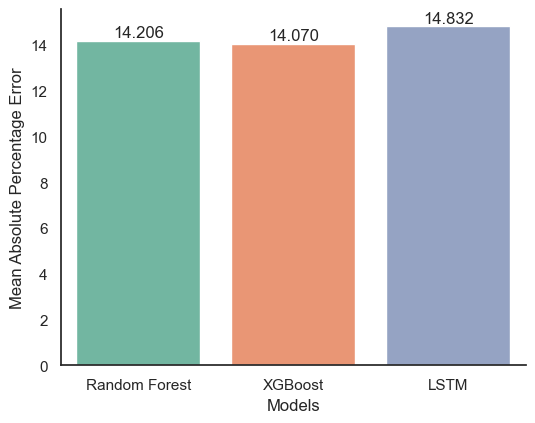

In [298]:
visualise_comparison(mape_values,'Mean Absolute Percentage Error')

# User Input Sales Forecasting

In [299]:
user_input.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Current_Inventory
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1500
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,1500
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,1500
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,1500
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,1500


### User input after data preprocessing

In [300]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years
0,0.964275,0.0,0.007263,0.866667,0.323413,0.5,0.0,0.333333,0.416667
1,0.222983,1.0,0.031487,0.266667,0.235849,0.5,0.5,0.333333,0.083333
2,0.598095,0.0,0.061624,0.733333,0.894140,0.5,1.0,0.000000,0.458333
3,0.164335,0.0,0.014176,0.866667,0.524488,0.5,0.5,0.333333,0.083333
4,0.484706,1.0,0.067809,0.266667,0.862069,0.5,1.0,1.000000,1.000000


In [301]:
for x in r2_values:
    if (x == max(r2_values)):
        index = r2_values.index(x)
        if (index == 0):
            model = best_rf
            model_mae = rf_mae
        elif (index == 1):
            model = best_xgb
            model_mae = xgb_mae
        else:
            model = lstm_model
            model_mae = lstm_mae

In [302]:
model

XGBRegressor(alpha=0.1, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [303]:
# Save the model to the specified file path
import joblib
joblib.dump(model,'model.pkl')

['model.pkl']

In [304]:
predicted_sales=model.predict(test)

In [305]:
original_predicted_sales = np.power(predicted_sales, 3)

In [306]:
# #Add a new column with Initial inventory values
# inventory_value = 1500  # Set your desired default value
# user_input['Current_Inventory'] = inventory_value 

In [307]:
user_input

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Current_Inventory
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1500
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,1500
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,1500
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,1500
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,1500
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,1500
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,1500
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,1500
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,1500


In [308]:
user_input['Predicted_Sales'] = original_predicted_sales
user_input['Predicted_Sales'] = round(user_input['Predicted_Sales'])


In [309]:
user_input

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Current_Inventory,Predicted_Sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1500,1473.0
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,1500,1284.0
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,1500,540.0
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,1500,2246.0
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,1500,5815.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,1500,1959.0
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,1500,2267.0
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,1500,1732.0
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,1500,3107.0


In [310]:
# Calculate the difference between columns
user_input['Difference'] = user_input['Current_Inventory'] - user_input['Predicted_Sales']

# Create a new column with 'negative' for negative differences
user_input['Inventory_recommendation'] = user_input['Difference'].apply(lambda x: f' Order {(round((-x)))} items' if x < 0 else 'Sufficient stock present')

### User Input with predicted output and inventory recommendation

In [311]:
user_input.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Current_Inventory,Predicted_Sales,Difference,Inventory_recommendation
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1500,1473.0,27.0,Sufficient stock present
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,1500,1284.0,216.0,Sufficient stock present
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,1500,540.0,960.0,Sufficient stock present
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,1500,2246.0,-746.0,Order 746 items
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,1500,5815.0,-4315.0,Order 4315 items


In [312]:
# Save the DataFrame to a CSV file
user_input.to_csv('output_data.csv', index=False)  # Set index=False to avoid writing row numbers

print(f"DataFrame saved to output_data.csv")

DataFrame saved to output_data.csv


# Data Visualisation on Item with most sales 

### Most sold Item Category

In [313]:
columns_to_copy = ['Item_Type', 'Predicted_Sales']
df = user_input[columns_to_copy].copy()

In [314]:
# Group the data by 'names' and calculate the sum of values for each group
grouped = df.groupby('Item_Type')['Predicted_Sales'].sum().reset_index()

# Rename columns in the grouped DataFrame
grouped.columns = ['Item_Type', 'Total_Predicted_Sales']

In [315]:
grouped = grouped.sort_values(by='Total_Predicted_Sales', ascending=False)

In [316]:
top_demand_items = grouped.head(10)

In [317]:
top_demand_items

,Item_Type,Total_Predicted_Sales
13,Snack Foods,1634979.0
6,Fruits and Vegetables,1570582.0
9,Household,1351744.0
5,Frozen Foods,1044071.0
4,Dairy,943802.0
3,Canned,834281.0
0,Baking Goods,795271.0
8,Health and Hygiene,660483.0
10,Meat,618187.0
14,Soft Drinks,577274.0


In [318]:
def item_category_sales_visualise(data):# Item_Type column
 plt.figure(figsize=(30,6))
 sns.barplot(x='Item_Type', y= 'Total_Predicted_Sales', data= data.head(10), palette="Set2")
 plt.show()

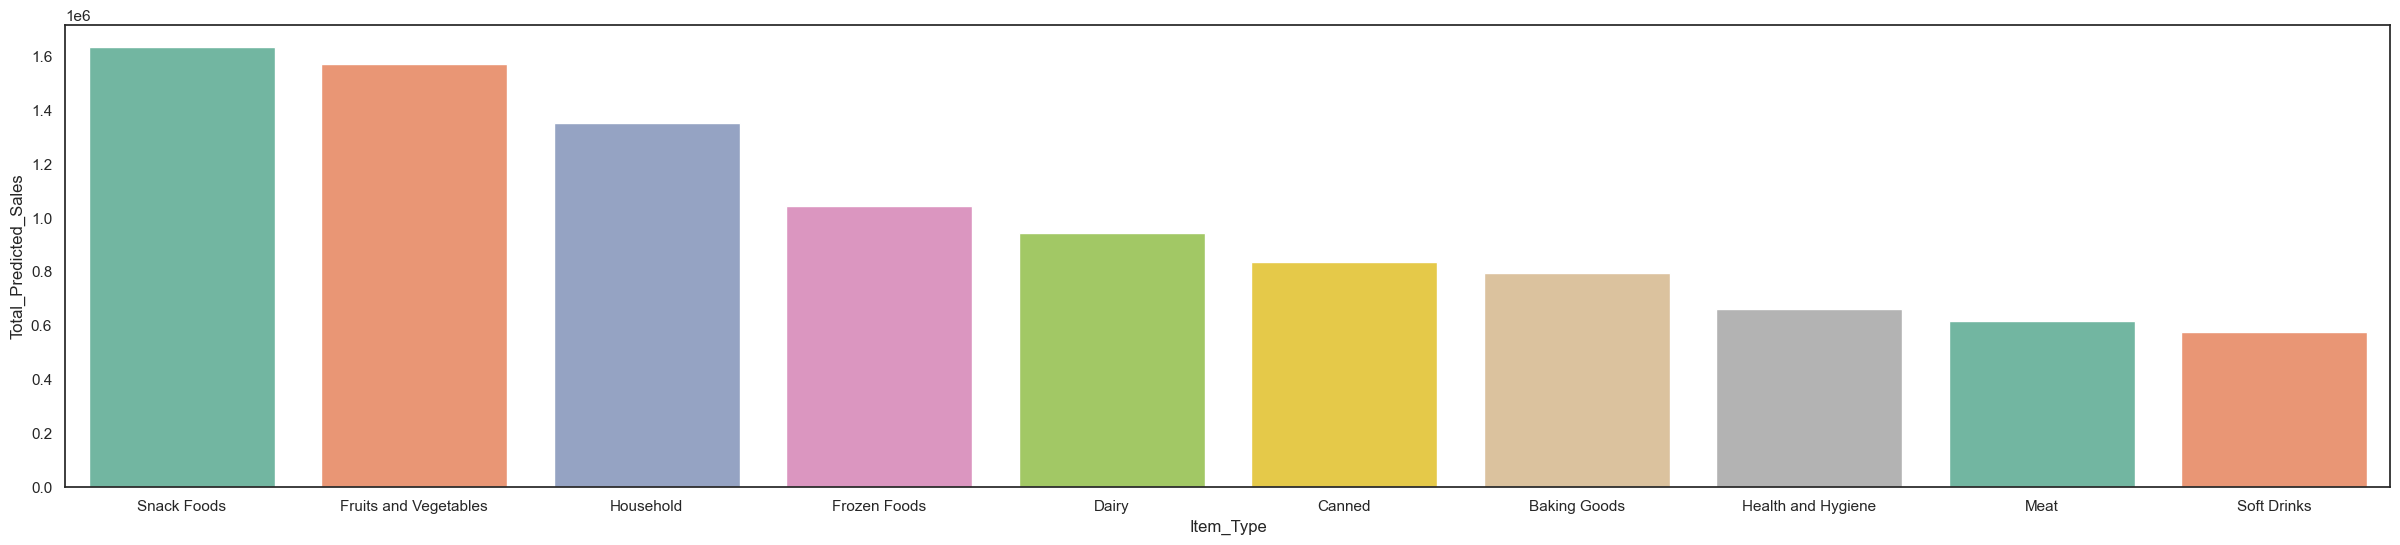

In [319]:
item_category_sales_visualise(grouped)

### Most sold Item Category in Small Outlet

In [320]:
def summarise_outlet_type_sales(category):
 # Select rows based on the values in Column_3 and copy Column_1 and Column_2
 outlet_sales = user_input[user_input['Outlet_Size'].isin([category])][columns_to_copy].copy()

 # Group the data by 'names' and calculate the sum of values for each group
 outlet_sales_total = outlet_sales.groupby('Item_Type')['Predicted_Sales'].sum().reset_index()

 # Rename columns in the grouped DataFrame
 outlet_sales_total.columns = ['Item_Type', 'Total_Predicted_Sales']

 outlet_sales_total = outlet_sales_total.sort_values(by='Total_Predicted_Sales', ascending=False)

 return outlet_sales_total

In [321]:
small_outlet_sales_total = summarise_outlet_type_sales('Small')
small_outlet_sales_total.head(10)

,Item_Type,Total_Predicted_Sales
13,Snack Foods,400537.0
6,Fruits and Vegetables,398999.0
9,Household,296992.0
5,Frozen Foods,226521.0
4,Dairy,219223.0
0,Baking Goods,189790.0
3,Canned,180397.0
8,Health and Hygiene,173141.0
10,Meat,148729.0
14,Soft Drinks,133915.0


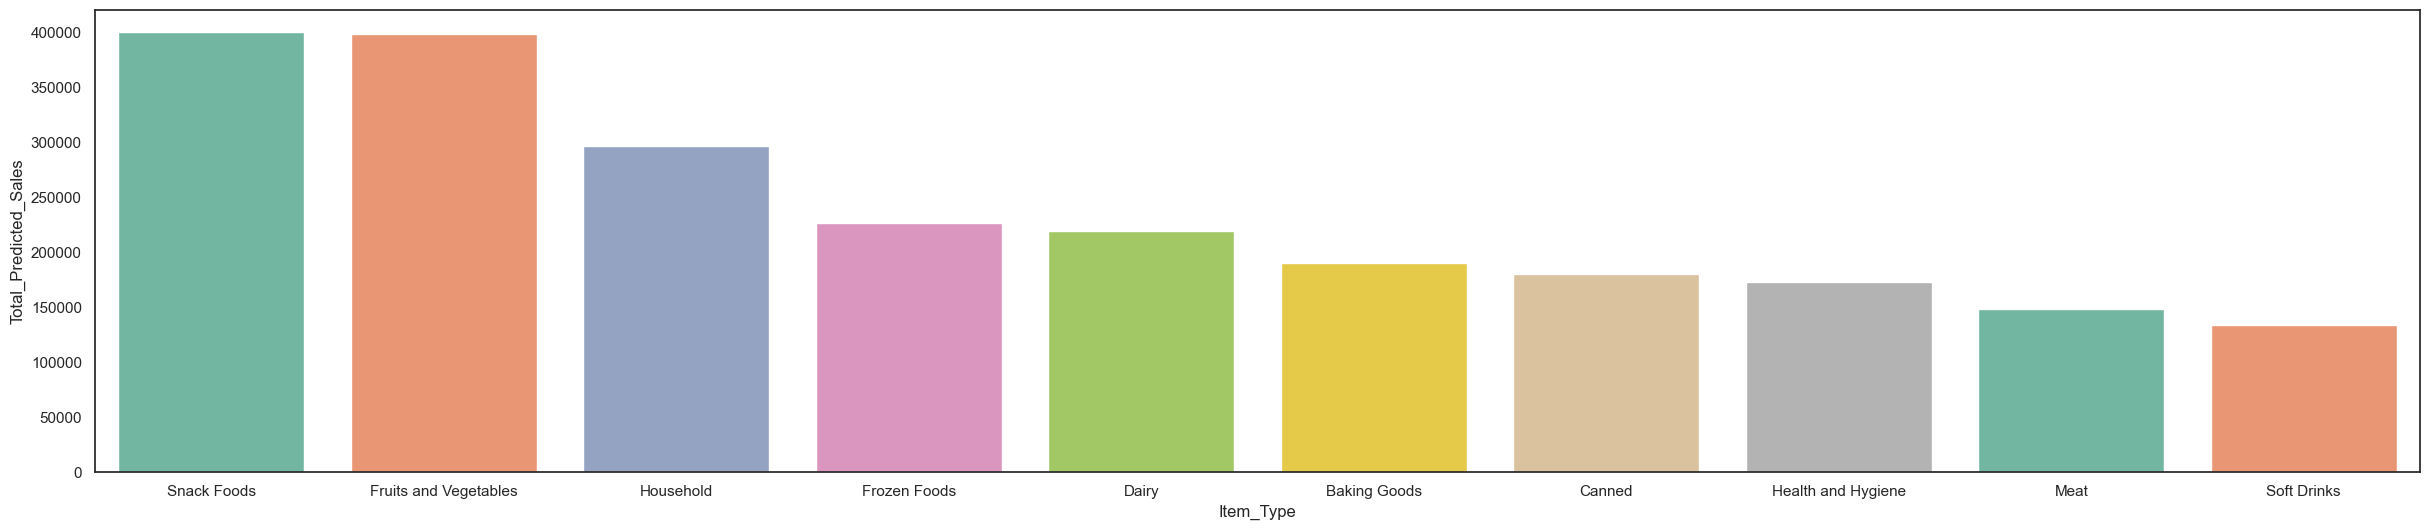

In [322]:
item_category_sales_visualise(small_outlet_sales_total)

### Most sold Item Category Medium Outlet

In [323]:
medium_outlet_sales_total = summarise_outlet_type_sales('Medium')
medium_outlet_sales_total.head(10)

,Item_Type,Total_Predicted_Sales
6,Fruits and Vegetables,628508.0
13,Snack Foods,621099.0
9,Household,567870.0
5,Frozen Foods,433914.0
4,Dairy,393108.0
3,Canned,341428.0
0,Baking Goods,338424.0
8,Health and Hygiene,271323.0
14,Soft Drinks,261158.0
10,Meat,215724.0


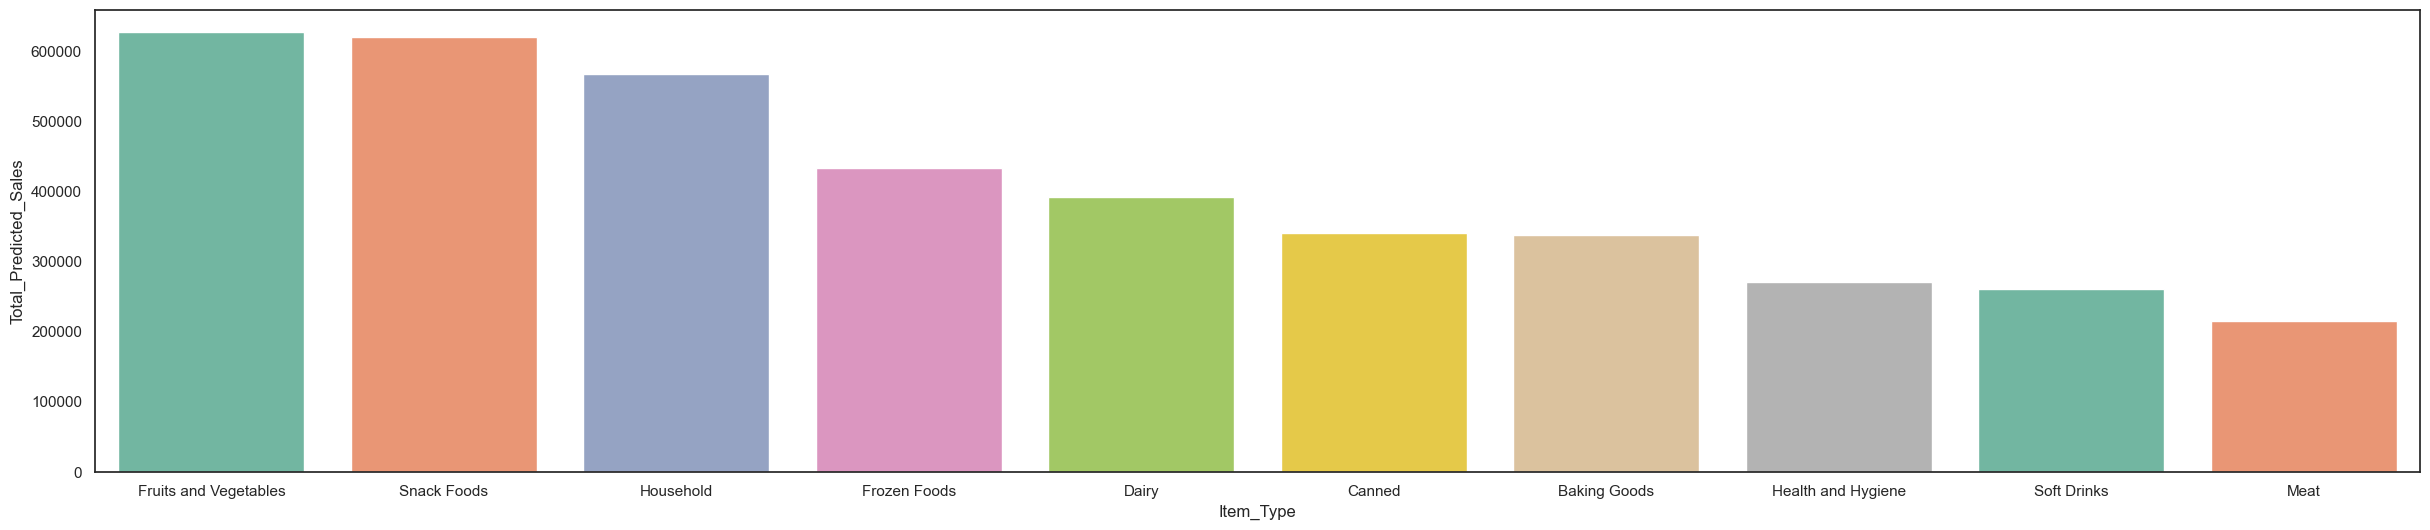

In [324]:
item_category_sales_visualise(medium_outlet_sales_total)

### Most sold Item Category in Large Outlet

In [325]:
large_outlet_sales_total = summarise_outlet_type_sales('High')
large_outlet_sales_total.head(10)

,Item_Type,Total_Predicted_Sales
13,Snack Foods,207854.0
6,Fruits and Vegetables,167275.0
9,Household,150076.0
5,Frozen Foods,128235.0
3,Canned,114329.0
4,Dairy,88586.0
0,Baking Goods,85918.0
10,Meat,83971.0
14,Soft Drinks,64845.0
8,Health and Hygiene,64036.0


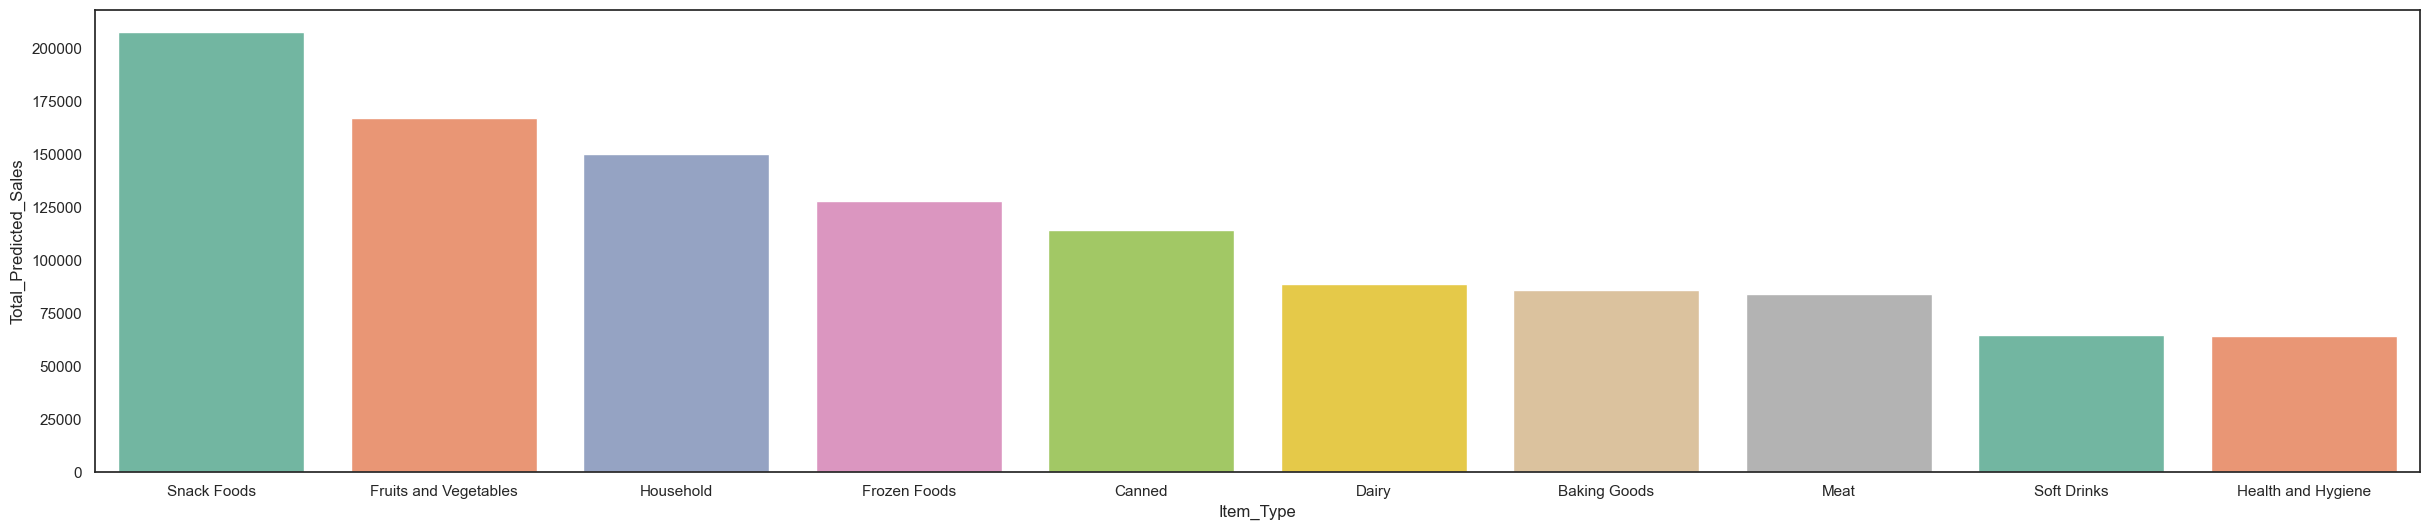

In [326]:
item_category_sales_visualise(large_outlet_sales_total)